In [1]:
# change directory
import os
rootdir = os.path.dirname(os.getcwd())
os.chdir(rootdir)

# make imports
from utils import rendering as vw

In [2]:
benchmarkid = 'BencheikhAl2022'
dbmsid = 'Sqlite'

In [3]:
ganttview = vw.GanttView(benchmarkid, dbmsid)
ganttview

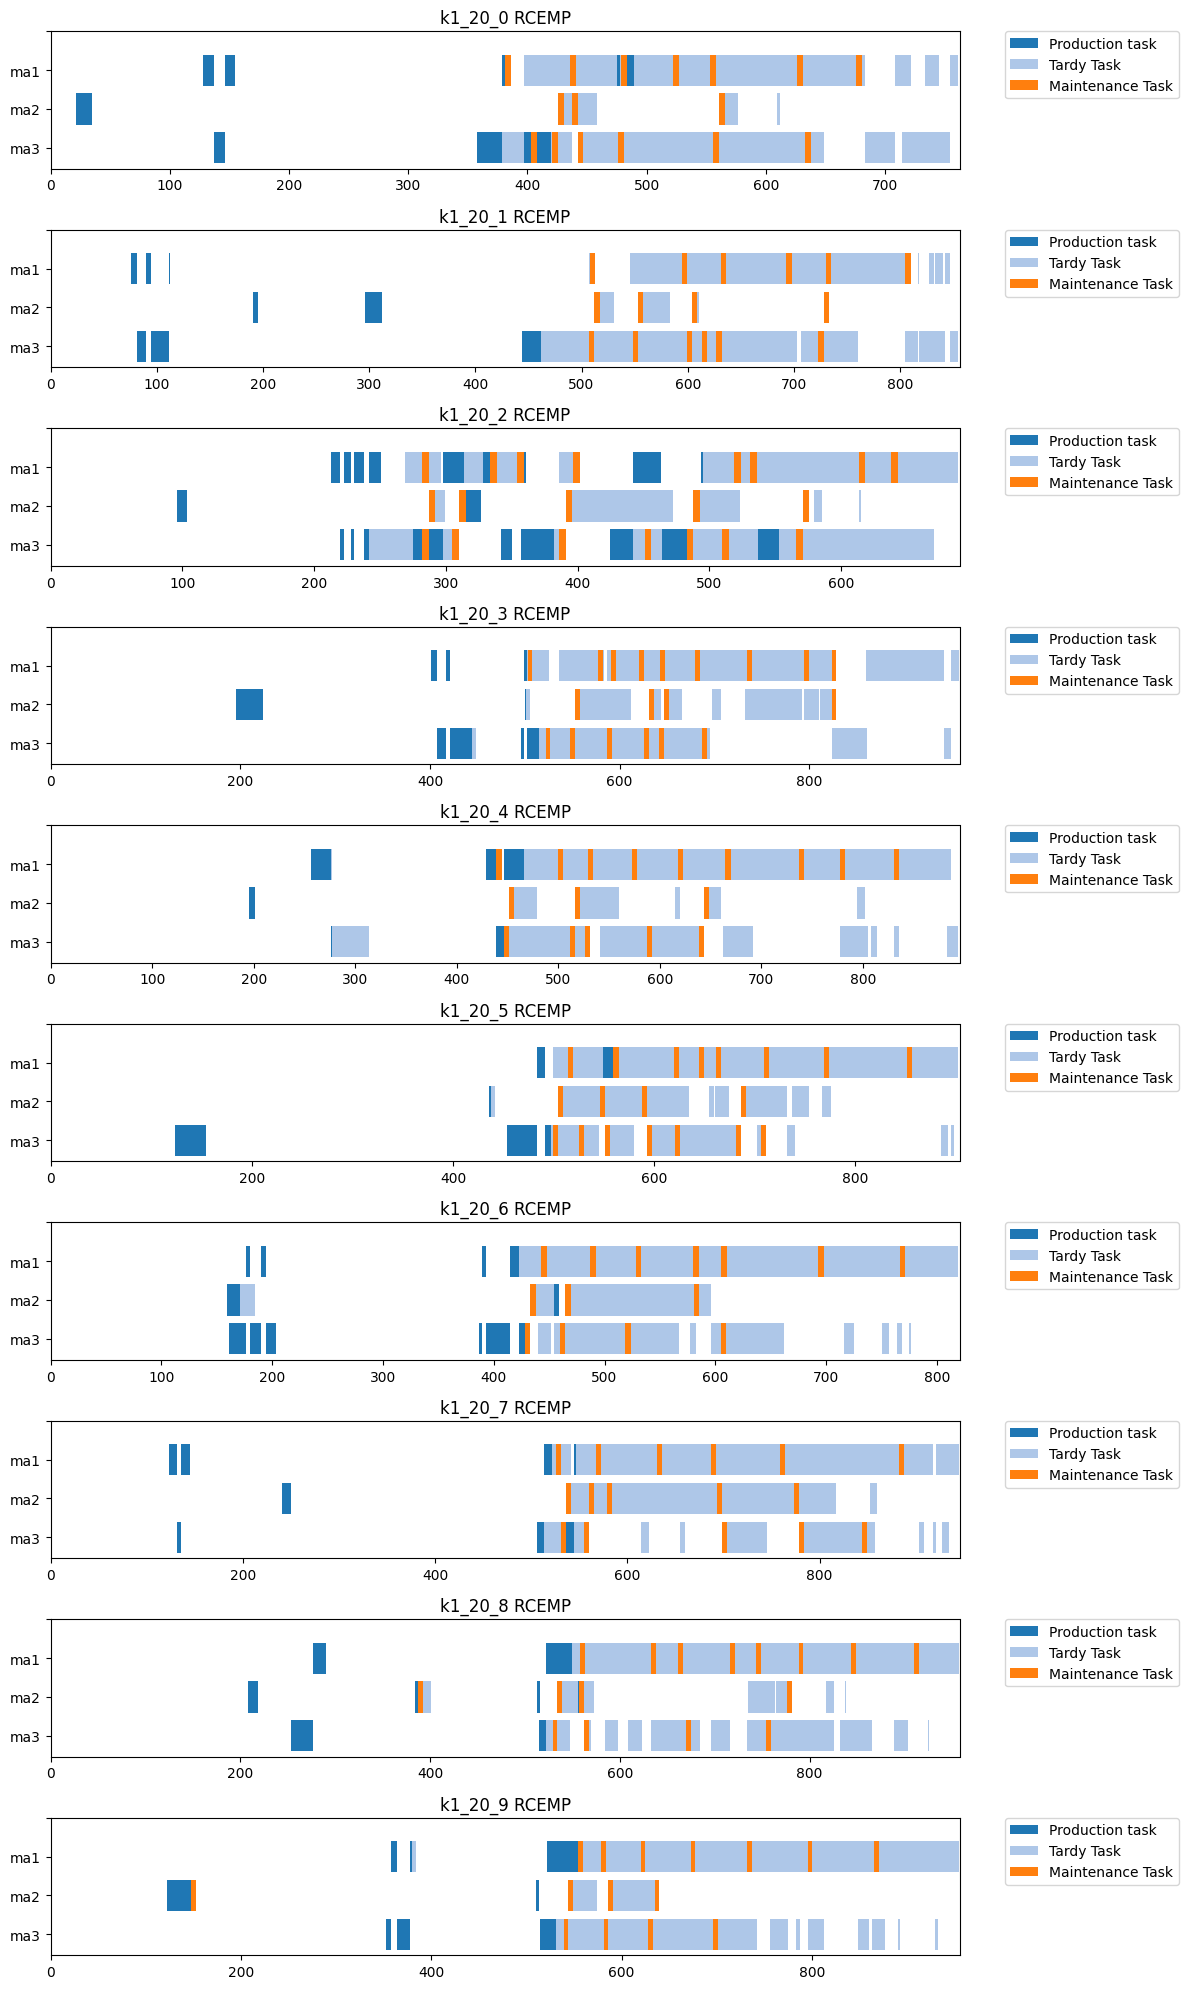

In [4]:
f = lambda exp: f"{exp['problem_name']} {exp['model_name'][:-5]}"
ganttview.plot('k1_20__', '%CEMPM%', title_format=f)

In [5]:
f = lambda exp: f"{exp['problem_name'][:-2].replace('_', '-')} ({exp['model_name'][:-5]})"
f = lambda exp: '(a)' if exp['model_name'][:-5] == 'SCEMP' else '(b)'
ganttview.plot('k1_10_3', '%CEMPM%', title_format=f, time_window=(0, 1200), saveas='gantt_comparison.png')

'No figure'

In [6]:
prod_var_names = ['Cmax', 'R', 'nR']
statsview = vw.StatsView(benchmarkid, dbmsid)
statsview.compare('RCEMPModel', 'SCEMPModel', prod_var_names, 
                  instance_pattern='(\S+)_\d+', by_method=True,
                  save_as='prod_performances.csv')

model_name RCEMPModel               
var_name         Cmax        R    nR
k1_20           984.8  7901.55  18.5
average         984.8  7901.55  18.5

In [7]:
maint_var_names = ['nTM', 'Abar']
statsview.compare('RCEMPModel', 'SCEMPModel', maint_var_names, 
                  instance_pattern='(\S+)_\d+', by_method=True,
                  save_as='maint_performances.csv')

model_name RCEMPModel      
var_name         Abar   nTM
k1_20             1.0  16.8
average           1.0  16.8

In [8]:
exec_var_names = ['nC', 'Es']
statsview.compare('RCEMPModel', 'SCEMPModel', exec_var_names, 
                  instance_pattern='(\S+)_\d+', by_method=True,
                  save_as='exec_performances.csv')

model_name RCEMPModel     
var_name           Es   nC
k1_20        0.818849  3.1
average      0.818849  3.1

In [9]:
var_names = prod_var_names + maint_var_names + exec_var_names
statsview.test(var_names, problem_filter='%', save_as='test_performances.csv')

'Insufficient column'